# Hamoye Stage E Graded Quiz
# Time series forecasting for electric power consumption

Data Set Information:

Data Link: https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption

This archive contains 2075259 measurements gathered between December 2006 and November 2010 (47 months).

Notes:

1.(globalactivepower*1000/60 - submetering1 - submetering2 - submetering3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.

2.The dataset contains some missing values in the measurements (nearly 1.25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

Attribute Information:

date: Date in format dd/mm/yyyy
time: time in format hh:mm:ss
globalactivepower: household global minute-averaged active power (in kilowatt)
globalreactivepower: household global minute-averaged reactive power (in kilowatt)
voltage: minute-averaged voltage (in volt)
global_intensity: household global minute-averaged current intensity (in ampere)
submetering1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
submetering2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
submetering3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.


## 1.Import libraries, read data

In [8]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
path='/content/drive/MyDrive/Hamoye_internship/household_power_consumption.txt'

In [11]:
df=pd.read_csv(path,sep=';',low_memory=False)
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [13]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

## 2.Preprocessing

### 2.1 Missing values

In [14]:
#find rows with missing values
missing_rows = df[df.isnull().any(axis=1)]
missing_rows

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,?,?,?,?,?,?,NaN
6840,21/12/2006,11:24:00,?,?,?,?,?,?,NaN
19724,30/12/2006,10:08:00,?,?,?,?,?,?,NaN
19725,30/12/2006,10:09:00,?,?,?,?,?,?,NaN
41832,14/1/2007,18:36:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...,...
1990185,28/9/2010,19:09:00,?,?,?,?,?,?,NaN
1990186,28/9/2010,19:10:00,?,?,?,?,?,?,NaN
1990187,28/9/2010,19:11:00,?,?,?,?,?,?,NaN
1990188,28/9/2010,19:12:00,?,?,?,?,?,?,NaN


In [15]:
# find the share of rows with missing values in df
missing_rows_percentage = (len(missing_rows) / len(df)) * 100
missing_rows_percentage


1.2518437457686005

The share of missing values is small - 1.25%, so we may drop them.

In [18]:
#replace ? with NaN
df = df.replace('?', np.nan)
df.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3               0
dtype: int64

In [19]:
#forward fill missing values in df
df = df.fillna(method='ffill')
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

### 2.2 Data types

In [20]:
# Convert columns to numeric, except for 'Date' and 'Time'
cols_to_convert = df.columns[2:]
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [21]:
# Combine 'Date' and 'Time' into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df.set_index('Datetime', inplace=True)

# Drop 'Date' and 'Time' columns as they are no longer needed
df.drop(columns=['Date', 'Time'], inplace=True)

In [22]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.086168e+00,1.233280e-01,2.408416e+02,4.604226e+00,1.110995e+00,1.287958e+00,6.416570e+00
std,1.053172e+00,1.125144e-01,3.235574e+00,4.426775e+00,6.115908e+00,5.786865e+00,8.419505e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.390000e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.980000e-01,1.000000e-01,2.410200e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.524000e+00,1.940000e-01,2.428700e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


## 3.Feature Engineering

In [23]:
# Create the new feature
df['Other_Active_Power'] = (df['Global_active_power']*1000/60) - df['Sub_metering_1'] - df['Sub_metering_2'] - df['Sub_metering_3']
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Other_Active_Power
Datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
 7   Other_Active_Power     float64
dtypes: float64(8)
memory usage: 142.5 MB


## Hourly

In [25]:
df_h = df.resample('h').sum()
df_h.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Other_Active_Power
Datetime,,,,,,,,
2006-12-16 17:00:00,152.024,8.244,8447.18,651.6,0.0,19.0,607.0,1907.733333
2006-12-16 18:00:00,217.932,4.802,14074.81,936.0,0.0,403.0,1012.0,2217.200000
2006-12-16 19:00:00,204.014,5.114,13993.95,870.2,0.0,86.0,1001.0,2313.233333
2006-12-16 20:00:00,196.114,4.506,14044.29,835.0,0.0,0.0,1007.0,2261.566667
2006-12-16 21:00:00,183.388,4.600,14229.52,782.8,0.0,25.0,1033.0,1998.466667


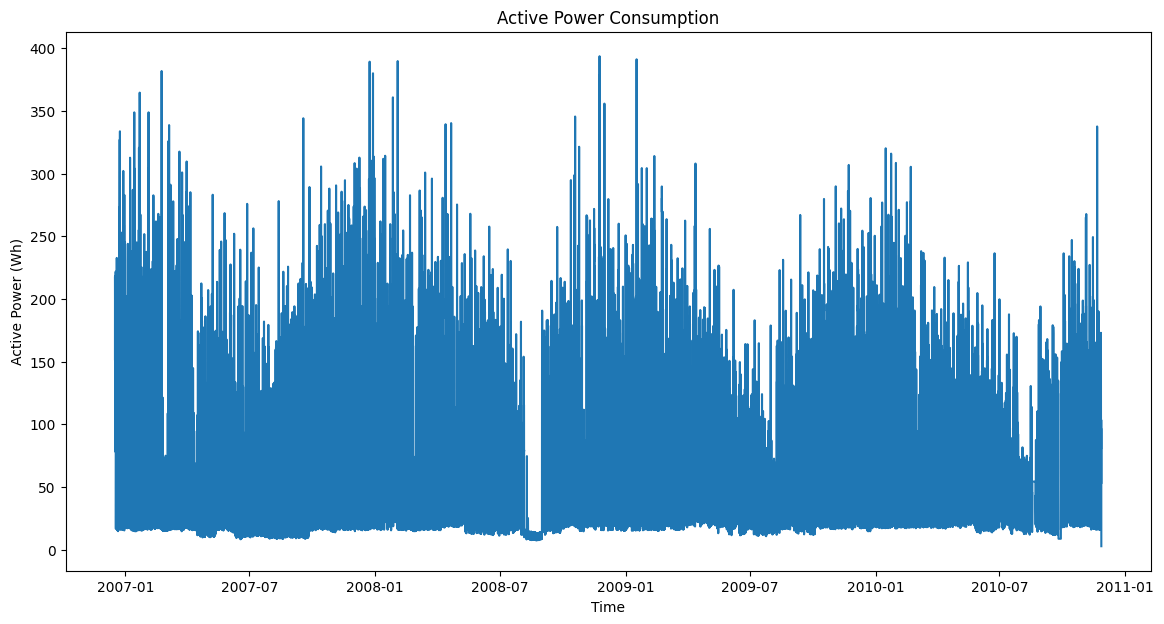

In [26]:
plt.figure(figsize=(14, 7))
plt.plot(df_h['Global_active_power'])
plt.title('Active Power Consumption')
plt.xlabel('Time')
plt.ylabel('Active Power (Wh)')
plt.show()

In [27]:
df_h.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Other_Active_Power
Global_active_power,1.000000,0.309464,-0.340758,0.999414,0.497064,0.440504,0.696577,0.753788
Global_reactive_power,0.309464,1.000000,-0.129650,0.325762,0.326167,0.255600,0.105055,0.197842
Voltage,-0.340758,-0.129650,1.000000,-0.353145,-0.186282,-0.145793,-0.242989,-0.246812
Global_intensity,0.999414,0.325762,-0.353145,1.000000,0.505443,0.447781,0.686647,0.754317
Sub_metering_1,0.497064,0.326167,-0.186282,0.505443,1.000000,0.116436,0.197376,0.237767
Sub_metering_2,0.440504,0.255600,-0.145793,0.447781,0.116436,1.000000,0.126188,0.129150
Sub_metering_3,0.696577,0.105055,-0.242989,0.686647,0.197376,0.126188,1.000000,0.221265
Other_Active_Power,0.753788,0.197842,-0.246812,0.754317,0.237767,0.129150,0.221265,1.000000


## Daily - Questions 14-16

Using the daily sampling rate (sum), divide the data into a train and test set. The last 300 days is your test set and the first (x-300) days is your training set. Where x is the length of the dataset. Use Facebook Prophet to train a Univariate time series modeling using this time column (‘dt’ or ‘ds’) and the global_active_power (or ‘y’). Answer question 14 - 16


In [72]:
# resample to daily mean
df_d = df.resample('D').sum()
df_d.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Other_Active_Power
Datetime,,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,14680.933333
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,36946.666667
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0,19028.433333
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0,13131.900000
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0,20384.800000


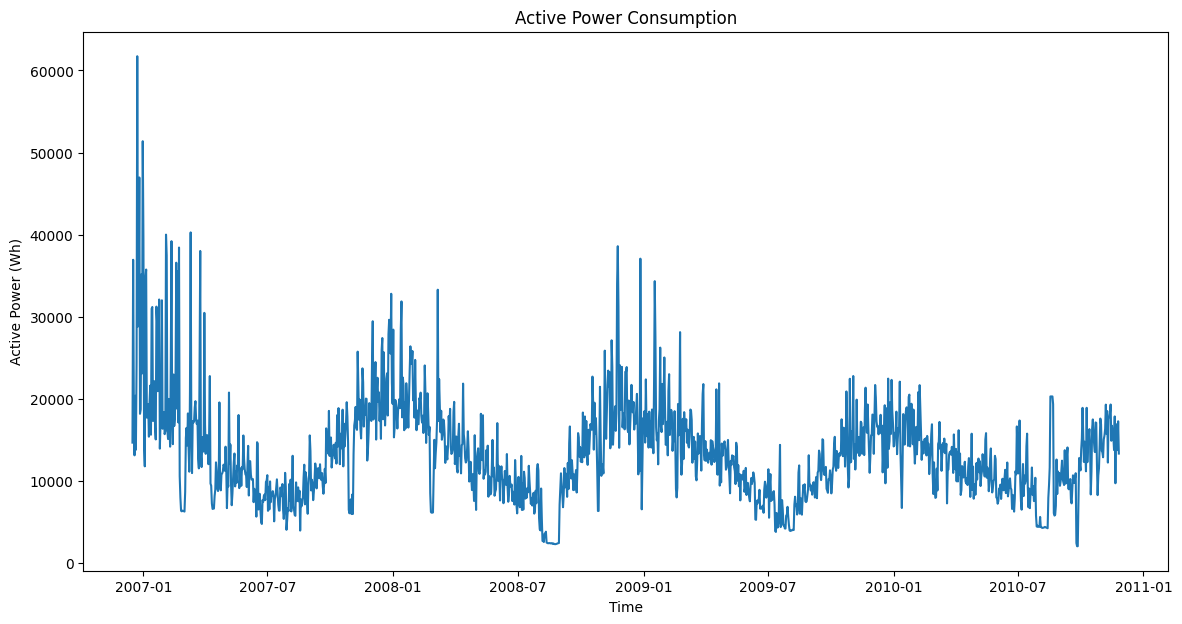

In [73]:
# Plot the time series
plt.figure(figsize=(14, 7))
plt.plot(df_d['Other_Active_Power'])
plt.title('Active Power Consumption')
plt.xlabel('Time')
plt.ylabel('Active Power (Wh)')
plt.show()

In [74]:
df_d.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Other_Active_Power       0
dtype: int64

In [75]:
total_days = len(df_d)

# Number of training days
train_days = total_days - 300

# Split the data into training and testing sets
train_df = df_d.iloc[:train_days]
test_df = df_d.iloc[train_days:]

print(f'Training set length: {len(train_df)}')
print(f'Testing set length: {len(test_df)}')

Training set length: 1142
Testing set length: 300


In [76]:
train_df.head(0)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Other_Active_Power
Datetime,,,,,,,,


In [77]:
# Prepare the data for Prophet - we need ts and y columns
train_prophet = train_df.reset_index().rename(columns={'Datetime': 'ds', 'Global_active_power': 'y'})
test_prophet = test_df.reset_index().rename(columns={'Datetime': 'ds', 'Global_active_power': 'y'})
train_prophet.head()


,ds,y,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Other_Active_Power
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,14680.933333
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,36946.666667
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0,19028.433333
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0,13131.900000
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0,20384.800000


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppvjub9nz/vzxojm5b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppvjub9nz/v8dutwof.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84350', 'data', 'file=/tmp/tmppvjub9nz/vzxojm5b.json', 'init=/tmp/tmppvjub9nz/v8dutwof.json', 'output', 'file=/tmp/tmppvjub9nz/prophet_modelshg_k3ed/prophet_model-20240618193404.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:34:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:34:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


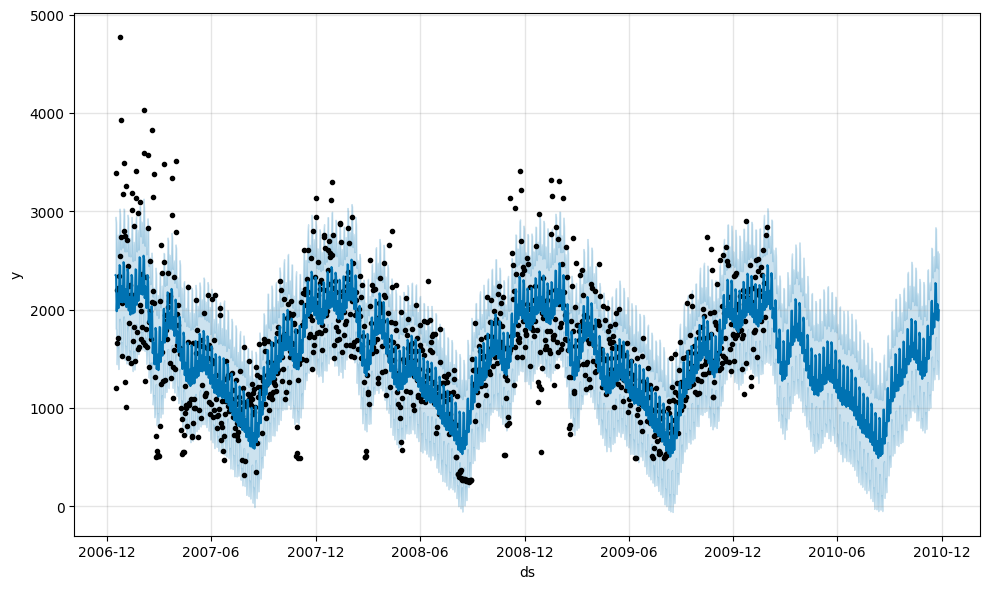

In [78]:
from prophet import Prophet

# Initialize and train the model
model = Prophet()
model.fit(train_prophet)

# Make future DataFrame for the test period
future = model.make_future_dataframe(periods=300)

# Predict future values
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
fig.show()


In [79]:
# Extract the forecasted values for the test period
forecast_test = forecast.set_index('ds').loc[test_df.index]

# Merge the forecast with the actual test data
results = test_df[['Global_active_power']].join(forecast_test[['yhat']])

# Print the results
print(results.head())



            Global_active_power         yhat
Datetime                                    
2010-01-31             1799.196  2432.237708
2010-02-01             1693.778  2056.789680
2010-02-02             2157.432  2193.262581
2010-02-03             2903.014  2187.598834
2010-02-04             2316.270  2006.677420


In [80]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(results['Global_active_power'], results['yhat'])
rmse = mean_squared_error(results['Global_active_power'], results['yhat'], squared=False)

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')


Mean Absolute Error: 295.3780195111622
Root Mean Squared Error: 401.6085240222927


In [81]:
# Calculate the absolute percentage error for each prediction
results['absolute_percentage_error'] = abs((results['Global_active_power'] - results['yhat']) / results['Global_active_power']) * 100

# Calculate MAPE
mape = results['absolute_percentage_error'].mean()
mape

27.202153400074174

## Weekly

In [82]:
#resample to weekly
df_w = df.resample('W').sum()
df_w.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Other_Active_Power
Datetime,,,,,,,,
2006-12-17,4599.636,260.928,439277.85,19579.4,2033.0,4733.0,18267.0,51627.600000
2006-12-24,17477.616,1176.174,2433008.76,73994.4,11190.0,21351.0,77447.0,181305.600000
2006-12-31,19748.954,1453.162,2438445.99,83075.4,14313.0,22666.0,67273.0,224897.233333
2007-01-07,14961.068,1348.954,2428490.09,63122.2,5857.0,17599.0,54193.0,171702.133333
2007-01-14,16179.556,1590.596,2421917.92,68864.8,13420.0,18989.0,83372.0,153878.266667


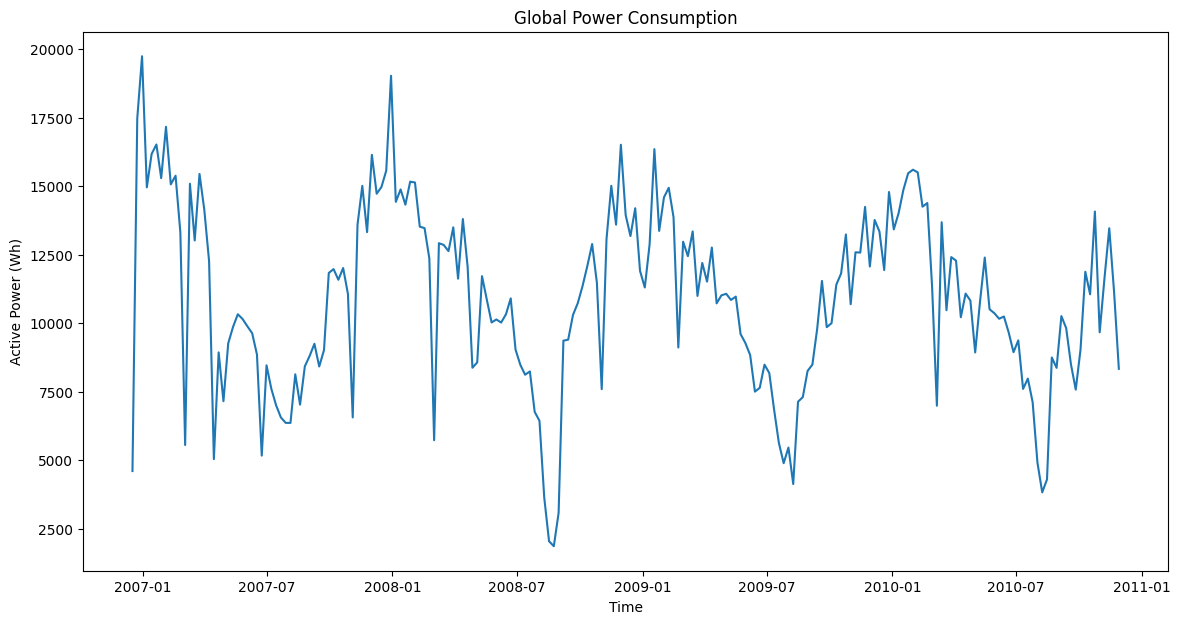

In [83]:
#plot weekly
plt.figure(figsize=(14, 7))
plt.plot(df_w['Global_active_power'])
plt.title('Global Power Consumption')
plt.xlabel('Time')
plt.ylabel('Active Power (Wh)')
plt.show()

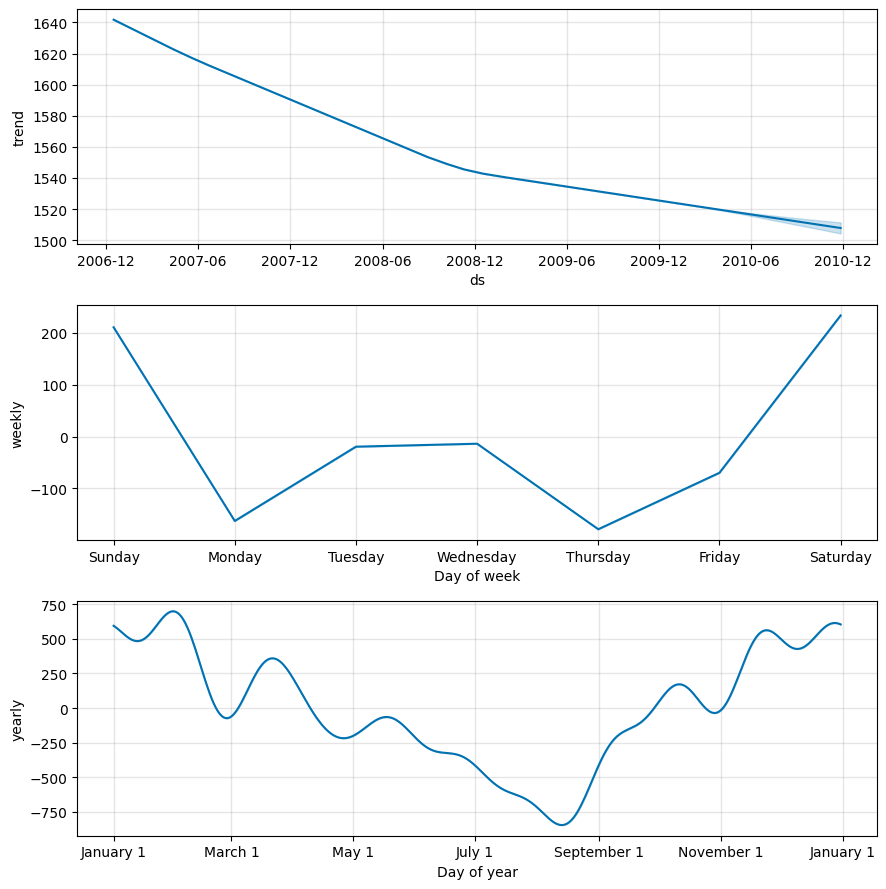

In [84]:
fig = model.plot_components(forecast)

So, Thursday has the lowest values.

## Q.17-20 Multivariate Time Series Forecasting with Facebook Prophet

In the last exercise, we used only the dependent variable (Global_Active_Power) and the time component for our modeling (ds vs y). Next, we will build a time series model using the other variables. These variables will be added to the forecast model as a regressor on Facebook Prophet. So the six independent variables ['Global_reactive_power', 'Voltage','Global_intensity', 'Sub_metering_1','Sub_metering_2','Sub_metering_3'] will be [‘add1’, ‘add2’, ‘add3’, ‘add4’, ‘add5’, ‘add6’] as the regressors. Split the data into train and test as done above and build a multivariate forecast model to forecast the last 300 days of the house consumption (‘global_active_power’). Answer questions 17-20:

In [85]:
# Prepare the data for Prophet
train_prophet_m = train_df.reset_index().rename(columns={'Datetime': 'ds', 'Global_active_power': 'y','Global_reactive_power':'add1',
                                                         'Voltage':'add2', 'Global_intensity':'add3','Sub_metering_1':'add4',
                                                         'Sub_metering_2':'add5','Sub_metering_3':'add6'})
test_prophet_m = test_df.reset_index().rename(columns={'Datetime': 'ds', 'Global_active_power': 'y','Global_reactive_power':'add1',
                                                         'Voltage':'add2', 'Global_intensity':'add3','Sub_metering_1':'add4',
                                                         'Sub_metering_2':'add5','Sub_metering_3':'add6'})

train_prophet_m.head()


,ds,y,add1,add2,add3,add4,add5,add6,Other_Active_Power
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,14680.933333
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,36946.666667
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0,19028.433333
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0,13131.900000
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0,20384.800000


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppvjub9nz/e47lk7wp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppvjub9nz/uocylr61.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49928', 'data', 'file=/tmp/tmppvjub9nz/e47lk7wp.json', 'init=/tmp/tmppvjub9nz/uocylr61.json', 'output', 'file=/tmp/tmppvjub9nz/prophet_modelx0badi1k/prophet_model-20240618193640.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:36:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:36:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


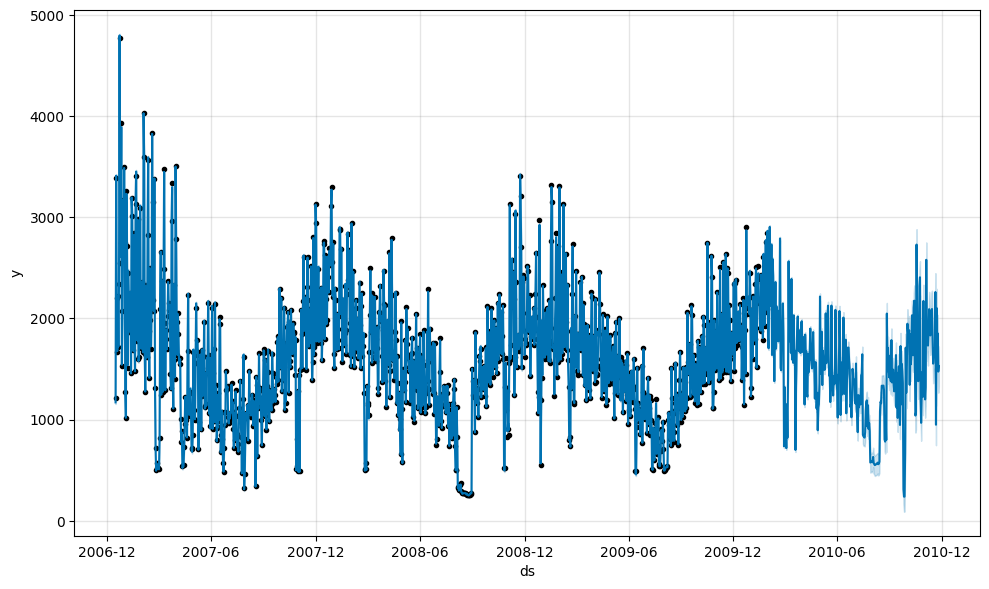

In [86]:

# Initialize the Prophet model
model_m = Prophet()

# Add the regressors to the model
for i in range(1, 7):
    model_m.add_regressor(f'add{i}')

# Fit the model
model_m.fit(train_prophet_m)

# Make future DataFrame for the test period
future = model_m.make_future_dataframe(periods=300)
for i in range(1, 7):
    future[f'add{i}'] = pd.concat([train_prophet_m[f'add{i}'], test_prophet_m[f'add{i}']], ignore_index=True)

# Predict future values
forecast_m = model_m.predict(future)

# Plot the forecast
fig = model_m.plot(forecast_m)
fig.show()


In [87]:
# Extract the forecasted values for the test period multivariate
forecast_test_m = forecast_m.set_index('ds').loc[test_df.index]

# Merge the forecast with the actual test data
results_m = test_df[['Global_active_power']].join(forecast_test_m[['yhat']])

# Print the results
print(results.head())

            Global_active_power         yhat  absolute_percentage_error
Datetime                                                               
2010-01-31             1799.196  2432.237708                  35.184700
2010-02-01             1693.778  2056.789680                  21.432070
2010-02-02             2157.432  2193.262581                   1.660798
2010-02-03             2903.014  2187.598834                  24.643876
2010-02-04             2316.270  2006.677420                  13.365997


In [88]:
# Evaluate the model
mae = mean_absolute_error(results_m['Global_active_power'], results_m['yhat'])
rmse = mean_squared_error(results_m['Global_active_power'], results_m['yhat'], squared=False)

print(f'Mean Absolute Error_m: {mae}')
print(f'Root Mean Squared Error_m: {rmse}')

# Calculate the absolute percentage error for each prediction
results_m['absolute_percentage_error'] = abs((results['Global_active_power'] - results['yhat']) / results['Global_active_power']) * 100

# Calculate MAPE
mape = results_m['absolute_percentage_error'].mean()

print(f'Mean Absolute Percentage Error_m: {mape}')

Mean Absolute Error_m: 30.906589776272508
Root Mean Squared Error_m: 33.82897973979431
Mean Absolute Percentage Error_m: 27.202153400074174


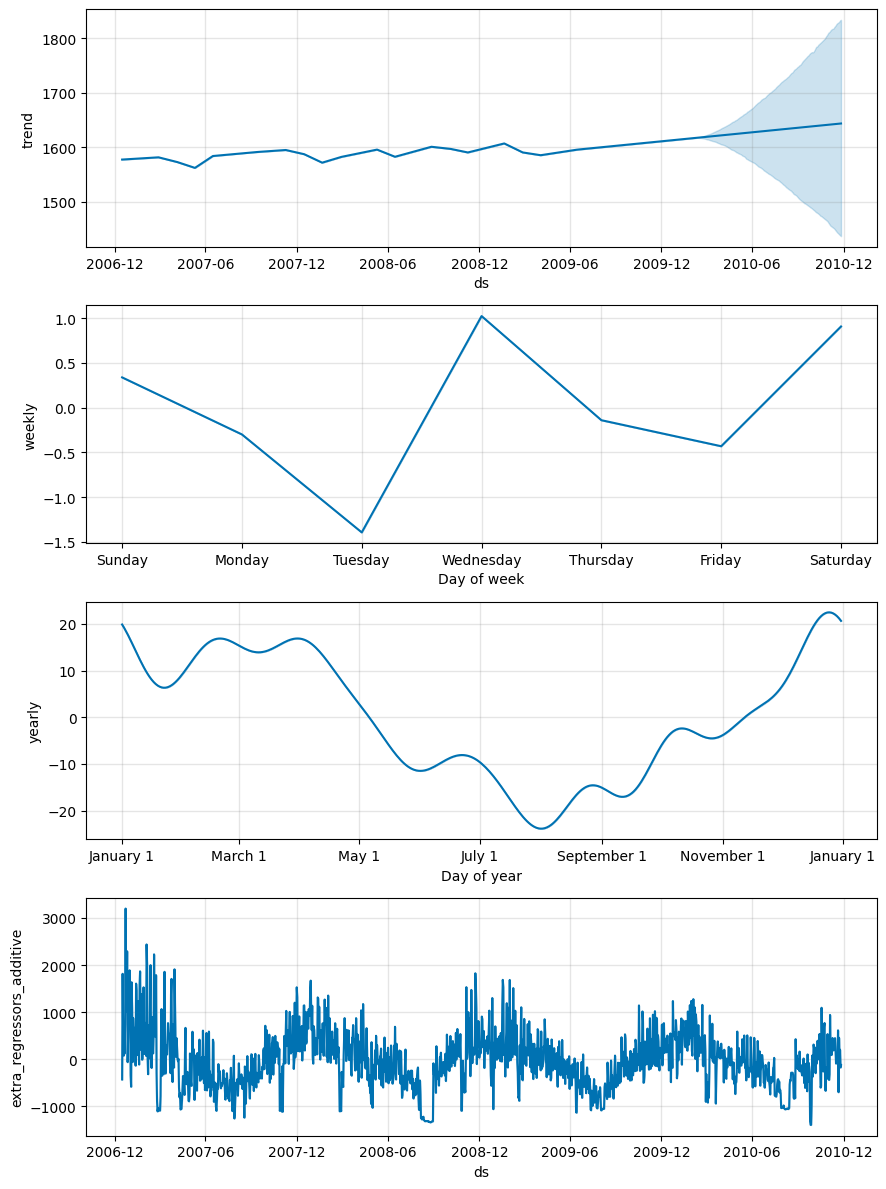

In [89]:
fig = model_m.plot_components(forecast_m)

Q19: Now Tuesday has the lowest value

Q20: August has the lowest value